In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
plt.rcParams['figure.figsize'] = [16, 6]

# Brownian motion, squared

We know that if $B(t)$ is standard Brownian motion,
then since $df(B) = f'(B)dB + f''(B)dt$, with $f(x) = x^2$ we have that
$$  dB(t)^2 = 2 B(t) dB(t) + t , $$
and so if $X(t) = B(t)^2$ then with $B(0) = 0$,
$$\begin{aligned}
  X(t) &= \int_0^t 2B(s) dB(s) + t \\
      &= \int_0^t 2\sqrt{X(s)} dB(s) + t .
\end{aligned}$$
We'll simulate $B(t)^2$ in these three ways.

In [46]:
# First,  simulation B(t) then square it
import numpy as np
rng = np.random.default_rng()

T = 10
dt = 1e-5
n = int(T / dt + 1)
B = np.zeros(n)
B[0] = 1
dB = rng.normal(scale=np.sqrt(dt), size=n-1)

for k in range(1, n):
    B[k] = B[k-1] + dB[k-1]
        

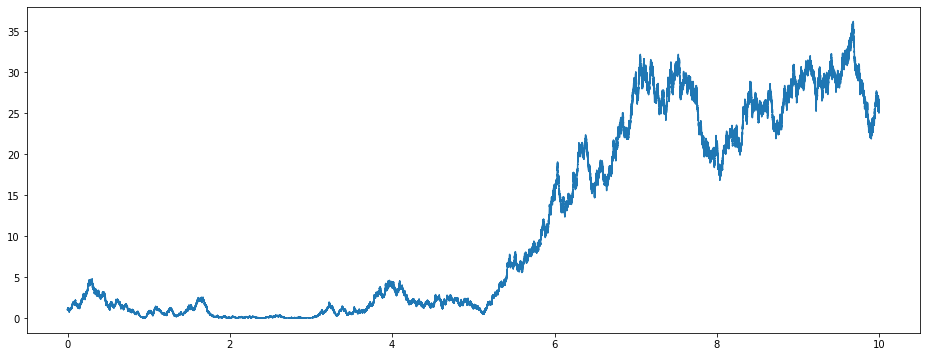

In [48]:
fig, ax = plt.subplots()
t = np.linspace(0, T, n)
ax.plot(t, B**2);

In [49]:
# next, integrate 2 B dB + dt:

X = np.zeros(n)
X[0] = B[0] ** 2
for k in range(1, n):
    X[k] = X[k-1] + 2 * B[k-1] * dB[k-1] + dt

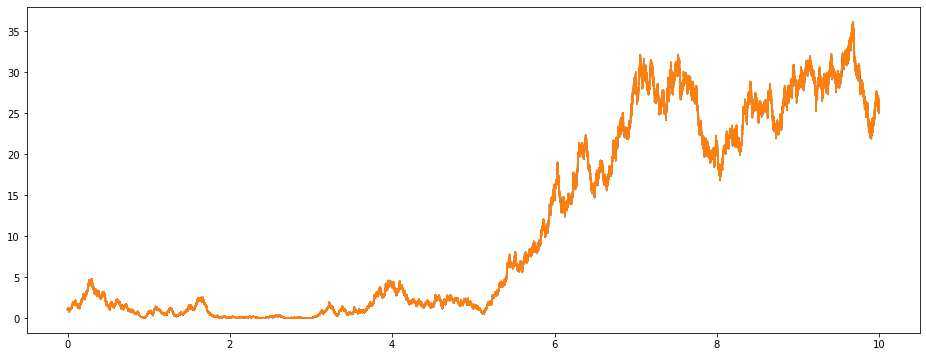

In [50]:
fig, ax = plt.subplots()
t = np.linspace(0, T, n)
ax.plot(t, B**2)
ax.plot(t, X);

In [56]:
# third way: integrate 2 sqrt(X) dB + dt

Y = np.zeros(n)
Y[0] = B[0]**2
for k in range(1, n):
    Y[k] = Y[k-1] + 2 * np.sqrt(max(0, Y[k-1])) * dB[k-1] + dt

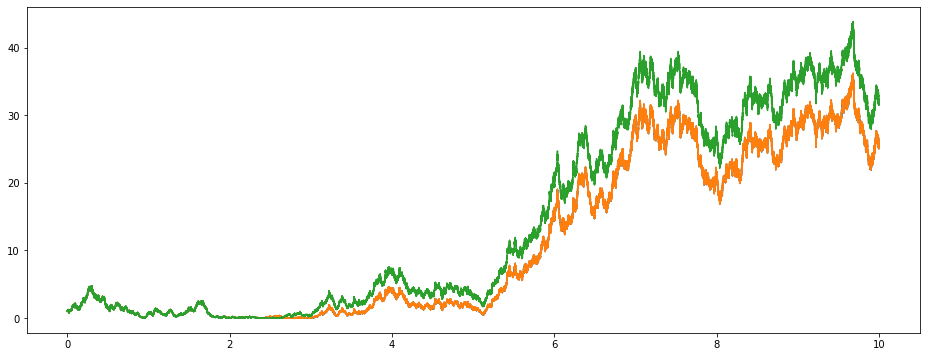

In [57]:
fig, ax = plt.subplots()
t = np.linspace(0, T, n)
ax.plot(t, B**2)
ax.plot(t, X)
ax.plot(t, Y);